<a href="https://colab.research.google.com/github/kooll/25t2/blob/main/book/ch07_translated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章. コードのテスト

テストを書くことは、良いコードを書くために重要なスキルです。テストとは、関数を呼び出してその動作を確認するコードのことです。これにより、コードが正しく動作しているという証拠と自信が得られます。前の章のログ記録と同様に、最初はテストを設定するのに少し労力がかかりますが、プロジェクトが成長するにつれてその労力は報われます。

もしあなたのコードが本当に小さな一回限りの実験であるなら、テストはそれほど重要でないかもしれません。しかし、もしあなたのコードがより大きなシステムの一部であるならどうでしょうか？もし他の人があなたのコードを変更しているとしたら？他のコードがあなたのコードに依存していて、特定の結果を返す必要があるとしたら？テストはあなたのコードが機能していることを保証し、あなたや他の誰かが行った変更がコードを壊すかどうかを知ることができます。

テストは、自分一人でコードを書いている場合にも重要です。テストは、安全網として機能し、コードを変更する際に、記憶に頼ることなくコードが正しく動作し続けることを保証します。また、テストはコードがどのように動作するべきかの例を示してくれるので、コードの読みやすさや保守性が向上します。

テストを始めるのは難しく感じるかもしれませんが、どこが問題になるかを知るための経験が役に立ちます。しかし、ここでは「基本テスト」で説明するように、コードが意図したとおりに動作しているかを確認することから始めることができます。その後、コードがうまく動作しない場面を見つけ次第、テストを追加していくことができます。

ソフトウェアの構築で重要なテストには2つの主要なタイプがあります。自動化されたコードテストとソフトウェア全体のユーザーテストです。ユーザーテストは別のチームが扱う可能性が高いですが、もしあなたがプロダクションコードを作成するのであれば、自動化されたテストを書くべきです。本書では自動化テストのみを取り上げます。

この章では、テストを書く動機について詳しく説明し、次に非常にシンプルなテストとより複雑なテストの書き方を説明します。テストを自動化する方法を紹介し、手動で実行する必要がないようにします。また、データの検証と機械学習のテストについても詳しく見ていきます。

(注釈、ノート）
明確にするために、この本で「テスト」と言う場合、A/Bテストは含まれません。A/Bテストでは、どちらのバリエーションが好ましいかを発見するための実験を行います。たとえば、ソフトウェアの機能の2つの異なるバージョンです。ここで取り上げるテストは、あなたのコードが期待通りに動作するかどうかを確認するためのものです。

## テストを書くべき理由

あなたは自分のコードが期待通りの結果を出すまでしばしば取り組みます。そして、その時点であなたの仕事は完了です。しかし、将来入力データが変わる場合や、コードに対する全ての可能な入力を試していないとしたらどうでしょうか？私はよく、自分のコードがある時点ではうまく動作するが、その後予期しない事態が起きて動かなくなるという経験をしています。これは、私のコードが堅牢ではないことを意味します。そして、もし私のコードが大きなシステムの一部であるならば、これは問題になります。

多くのことが変わる可能性があり、それがあなたのコードに影響を与え、故障する原因となることがあります。ライブラリや言語の新しいバージョンが出ることもあれば、コンピュータのオペレーティングシステムをアップグレードすることもあります。また、一般的には、あなたのコードが依存しているコードが変更されることもあります。あなたのコードが将来的に破綻する可能性がある理由についての詳細は、この記事を参照してください。テストは、あなたのコードを将来にわたり保証する手助けとなります。

さらに、開発した環境とは異なる環境では、コードが正しく動作しない可能性があります。例として、オンラインダッシュボードや他人のマシン、Dockerコンテナ、またはプロダクション環境があります。もしコードに対するテストがある場合は、コードを他の環境に移動し、テストを実行することで、その環境でもコードが動作することを確認できます。

テストは、コードが期待通りに動作することを確信するのに役立ちます。これによって、他の人があなたのコードを信頼しやすくなり、またそれが頑丈で高品質であることを示すシグナルになります。特に医療分野のような高リスクの状況で作業している場合や、多くのユーザーがコードに依存している場合には、コードの動作について何らかの保証をする必要があるかもしれません。

テストは、コードが何らかの形で壊れることを恐れずに変更を加える信頼感をもたらします。変更を加えたとしても、コードがまだ正しく機能しているという良いサインを提供します。これはデバッグ（第5章で述べたように）やリファクタリング（第8章で取り上げる予定です）に非常に役立ちます。

(コラム) テスト駆動開発 (Test Driven Development)

テスト駆動開発（TDD）は、ソフトウェア開発のプロセスであり、開発者がプロジェクトの目標を実際に達成する関数を書く前にテストを作成します。この方法の目的は、テストを使用してコードの要件を記述することであり、テストは期待される動作や関数の入力と出力を指定します。その後、開発者はテストに合格するためのコードを書きます。これにより、開発者はコードをモジュール化し、複雑な問題を容易にテスト可能な部分に分解することが奨励されます。

このアプローチは、多くのデータサイエンスプロジェクトには適していません。なぜなら、典型的なデータサイエンスプロジェクトの開始時には、どの関数が必要になるかが正確には分からないためです。多くの場合、探究的な作業から始め、プロジェクトの終わり近くになって初めてコードの構造がどうあるべきかが分かります。しかし、もしTDDについてもっと知りたい場合は、Michal JaworskiとTarek Ziadéによる「Expert Python Programming」（Packt, 2021）がTDDの観点からPythonの開発をカバーしています。

(コラムの終わり)

## テストするタイミング

データサイエンスプロジェクトでは、テストを書き始める時期を正確に把握することが難しい場合があります。プロジェクトの探索段階では、どのコードが将来有用になるか分からないため、テストに時間をかける価値は通常ありません。しかし、コードを再利用したり修正したりする必要がある場合は、テストを追加する良いタイミングとなります。また、一度きりの分析ではコードにテストを追加することはそれほど重要ではありません。迅速に結果を得ることと、結果が正しいことを確認するために時間をかけることの間にはトレードオフがあります。

プロジェクトの初期段階でテストを書くことは、一貫性のない名前、インポートの欠落、スペルミス、構文エラーなどの基本的なミスを早期に発見するのに役立ちます。これらのエラーは、時にはコードエディタでも捉えられないことがあります。

コードを本番環境にデプロイする前や他の人が使用する前にテストを書くことが最も重要です。これにより、コードが堅牢で再現可能であるという自信を持つことができます。また、コードに問題が発生し、予期しないエラーが発生した場合にはテストを追加する時期です。テストを追加することで、エラーの原因を見つける手助けになります。また、コードをリファクタリングする必要がある場合も、テストは非常に役立ちます。

自分自身のコードだけをテストすれば十分なことを忘れないでください。インポートしたライブラリや依存関係をテストする必要はありません。それらはあなたの責任ではなく、すでに独自のテストがあるはずです。

##  テストの取り組み方

シンプルなテストにどのように取り組むか見ていきましょう：テストの構成方法と書き方についてです。予期しない入力をどのようにテストするか、そしてコードがどのような入力を扱うことを期待しているかについて説明し、テストを自動的に実行する方法についても論じます。また、2つの一般的なテストのタイプ、ユニットテストと統合テストの例も示します。

基本的なテスト

最も単純なテストは、すべてが正しく機能している場合に予想される種類の入力で関数が正しく動作することを確認します。テストに何を含めるべきか悩んでいる場合、良い出発点として、関数を開発しているときにJupyterノートブックで繰り返し表示したいと思うものを考えることができます。

テストはPytestのドキュメントで説明されているように、4つの段階に構成することができます。

1. 準備: 関数を実行するために必要なすべてのものをセットアップします。例えば、データをロードするなどです
1. 実行: テスト対象の関数を実行します。
1. アサート: 関数を実行した結果が予想通りであることを確認します。
1. クリーンアップ: テストが痕跡を残さないようにしてください。例えば、ファイルを開いた場合は、必ずそれを閉じてください。

ここでは第2章の関数を使用して、以下のコードを書きます。

In [ ]:
def weighted_mean(list_of_numbers, weights):
    running_total = 0
    for i in range(len(list_of_numbers)):
        running_total += (list_of_numbers[i] * weights[i])
    return (running_total/sum(weights))

これは期待どおりに動作しているかを確認するテストです。もう一度、関数を以下に示します。

In [ ]:
from ch07_functions import weighted_mean  # ❶

def test_weighted_mean():  # ❷
    list_a = [1, 2, 4]     # ❸
    list_b = [1, 2, 4]     # ❸

    result = weighted_mean(list_a, list_b)  # ❹

    assert result == 3  # ❺


こちらは、この関数に付随するテストで、いくつかの簡単な入力を確認するものです。

1. テスト関数は関数とは別のPythonファイルにあり、関数はch07\_functions.pyファイルからインポートされています。テストを含むファイルの名前は、test\_\*.py　または, \*\_test.py という形式にする必要があります。

1. 慣例として、テスト関数名は test_ で始まります。

1. テストしようとしている関数のために入力データを生成する「準備 arrange」ステップ。

1. 選択した入力データを使用して関数を呼び出す「act」ステップ。

1. アサート assert ステップでは、関数が生成した結果が期待通りであるかどうかを確認します。



このテストでは、関数に対して一般的な入力セットから始めています。 assert 関数を実行し、結果が正しいことを確認しました。

次のステップは、テストを実行してパスするか確認することです。これには、Pytestなどのテストフレームワークを使用します。「Pytestによる自動テストの実行」で詳しく説明します。テストがパスした場合、少なくともこれらの入力データ値に対してコードが正しく動作していることが確認できます。もしテストが失敗した場合には、二つのことを確認する必要があります。まず、テストが正確で、アサーションステップで確認している値がその入力セットに対して期待通りであることを確認します。次に、テストが失敗する原因となっているコードの誤りを探し、その誤りを修正してテストをパスさせます。

こちらがもう一つの例です。これは第５章で見たことがあるものを使っています。

In [ ]:
from scipy.stats import linregress

def fit_trendline(year_timestamps):
    result = linregress(year_timestamps, data)
    slope = round(result.slope, 3)
    r_squared = round(result.rvalue**2, 3)
    return slope, r_squared

そして、これに対応するテストはこちらです。

In [ ]:
def test_fit_trendline():
    data = [1, 2, 3]
    timestamps = [2020, 2021, 2022]

    slope, r_squared = fit_trendline(timestamps, data)

    assert slope == 1
    assert r_squared == 1

この場合、私は偽のデータを使用することを選びました。これにより、傾きが1でR2値も1になるトレンドラインが生成されるはずです。これにより、関数が確かに期待通りに動作していることを確認できます。他のテストすべき入力については、次のセクションで説明します。

テストを別のフォルダーに配置し、テストを含むPythonファイルの名前を test\_ で始めるのは一般的な方法です。これにより、テストが他のコードから分離され、自動化されたテストランナーがテストを見つけやすくなります。この詳細については、「Pytestによる自動テストの実行」で説明します。

## 予期しない入力のテスト

予期した入力に対してコードが正常に動作するかテストするだけでなく、予期しない入力を扱えるかどうかをテストすることで、コードを堅牢にすることも有用です。これらはエッジケースとも呼ばれ、特別な処理が必要な極端または異常な入力の例です。

例には、空の文字列や不正な型のデータが含まれます。

こちらは、コードが予期しない入力に対しても堅牢であることを確認する方法の例です。

In [ ]:
def test_weighted_mean():
    result = weighted_mean([1, 2, 4], [1, 2, 4])
    assert result == 3

    empty_list_result = weighted_mean([], [])
    assert not empty_list_result

このテストでは、関数weighted_meanが、空のリストを入力として受け取るとNoneを返すことをテストしています。

このテストを通過させるためには、関数weighted_meanを修正すると次のようになります。

In [ ]:
def weighted_mean(num_list, weights):
    if not (num_list or weights):
        return None

    running_total = 0

    for i in range(len(num_list)):
        running_total += num_list[i] * weights[i]

    return running_total / sum(weights)

次に、関数が不正な型のデータを入力として受け取った場合に正しく動作するかどうかを確認するテストを追加したいと思います。以下が更新されたテストです。

In [ ]:
def test_weighted_mean():
    result = weighted_mean([1, 2, 4], [1, 2, 4])
    assert result == 3

    empty_list_result = weighted_mean([], [])
    assert not empty_list_result

    wrong_types_result = weighted_mean(['one', 2, 4], [1, 2, 4])
    assert not wrong_types_result


テストを更新した後、テストが通るように
コードを更新します。
テストを追加してから、コードを更新する例から分かるように、
テストを更新してからコードを更新するというループを繰り返します。

コードが正常に動作しているときに予期しない入力をテストするのは難しいです。というのも、どのように壊れるかを予測するのが難しいからです。しかし、コードが壊れた際にエラーを処理するようにコードを更新した場合、次に同じ問題が発生してもコードが壊れないようにテストを追加するべきです。また、重大な影響を引き起こす可能性のある入力を考慮してそれをテストすることも検討できますが、あらゆる可能な入力を予測しようとして自分を追い詰めるのは避けましょう。

いくつかの有用なライブラリを紹介したいと思います。Fakerライブラリは、タイムスタンプやメールアドレスなど、さまざまな形式で偽のデータを生成できます。本物のデータを読み取る必要がなくなるため、テストコードで表示されてはいけない個人情報や機密データを扱う場合に重要です。もう1つはHypothesisです。これは、コードが動作しないエッジケースを見つけるのに役立ちます。プロパティベースのテストを実行し、さまざまなシナリオを記述したテストを作成すると、Hypothesisライブラリがそれらを試してくれます。

## Pytestを使用した自動テストの実行

Pytestは、テストの検出、収集、および実行を扱うフレームワークです。Pytestや他の類似のフレームワークを使用すると、多くのテスト関数がある場合でも、すべてのテスト関数を個別に実行したり、すべてのテストを実行するためのボイラープレートコードを書く必要がありません。

PytestはPython標準ライブラリの一部ではありません。次のコマンドを使用してインストールしてください：
```
$ pip install pytest
```

次のコマンドで単一のテストファイルを実行できます。
```
$ pytest test_weighted_mean.py
```

フォルダー内のすべてのテストを実行したい場合は、次のコマンドを使用します。
```
$ pytest
```

Pytestはこのコマンドを実行するディレクトリ内のすべてのファイルを再帰的に検索し、test\_\*.py または \*\_test.py のパターンに一致するファイルからテストを実行します。これらのファイル内では、test\_ で始まるテスト関数が実行されます。Pytestがテストをどのように発見するかの詳細については、Pytestのドキュメントを参照してください。

すべてのテストが合格すると、次のような出力が表示されます。

```
============================= test session starts ==============================
platform darwin -- Python 3.10.4, pytest-7.4.0, pluggy-1.2.0
rootdir: /Users/.../book_code
collected 1 item

test_weighted_mean.py .                                                    [100%]

============================== 1 passed in 0.01s ===============================
```

テストに失敗すると、次のような出力になります。

```
============================= test session starts ==============================
platform darwin -- Python 3.10.4, pytest-7.4.0, pluggy-1.2.0
rootdir: /Users/.../book_code
collected 1 item

test_weighted_mean.py F                                                    [100%]

=================================== FAILURES ===================================
_____________________________ test_weighted_mean _______________________________

    def test_weighted_mean():
        result = weighted_mean([1, 2, 4], [1, 2, 4])
>       assert result == 3
E       assert 2.3333333333333335 == 3

test_weighted_mean.py:7: AssertionError
=========================== short test summary info ============================
FAILED test_weighted_mean.py::test_weighted_mean - assert 2.3333333333333335 == 3
============================== 1 failed in 0.49s ===============================
```

# Run the test

E 2.3333333333333335 == 3 のアサートが失敗しました。

`test_weighted_mean.py:7: AssertionError` というエラーメッセージは、`test_weighted_mean.py` ファイルの7行目でアサーションエラーが発生したことを示しています。エラーは、プログラムのその部分で期待される結果が得られなかったことを意味します。具体的な原因を特定するためには、コードを確認し、テストケースの期待される値と実際の値を比較してみてください。また、重み付き平均計算のロジックに誤りがないか確認することも重要です。

Pytestは、テストが失敗したことを示すメッセージを出力し、失敗した正確な行を強調表示します。また、アサーションエラーを出力し、コードが生成した不正確な値を表示します。

Pytestには、テストをスキップしたりログを処理したりする機能など、さらに高度な機能が多数あります。詳細については、Pytestのドキュメントを参照してください。

### (コラム)  他のテストフレームワーク

Pytestは、機能が豊富で使いやすいため、人気のあるテストフレームワークです。

ただし、他にもいくつかのオプションがあります。

Python標準ライブラリにある unittest は、依存関係を少なくしたい場合に役立ちます。しかし、セットアップはPytestより少し複雑です。

tox は、知っておく価値のある別のツールです。仮想環境の設定、アプリケーションのインストール、依存関係とPythonバージョンの管理を含むテストランナーです。このツールは、他の環境でコードが正しく動作することを確認するのに非常に役立ちます。

また、テストカバレッジの概念についても触れたいと思います。これは、すべてのテストが実行されたときに実行されるファイル内のコード行の割合を示します。

Pytestのプラグイン pytest-covを使用してテストカバレッジを測定できます。

あなたのすべての関数がテストされたことを確認するのに役立ちますが、実際に実行された行をチェックするだけで、テストされた行をチェックするわけではありません。

バージョン管理にコードをコミットする前にテストを実行するべきです（これについては第10章で説明します）。さらに詳しく話し、自動的にテストを実行する方法については第12章で説明します。

## テストの種類

ソフトウェアエンジニアリングにおけるさまざまなテストを説明する用語は多岐にわたります。Patrick Viaforeは『Robust Python』（O'Reilly, 2021）の中で、一般的に使用される6種類のテストを特定しています。

1. 単体テスト:
コードの単位（関数やクラスなど）が開発者の期待通りに動作するかどうかを確認します。

1. 統合テスト:
より大きなシステムが正しく接続されていることを確認します。

1. 受け入れテスト:
ユーザーが期待するようにシステムが動作することを確認します。

1. 負荷試験:
負荷が大きい(データ量, ユーザー数などが増加した)場合でも
システムが正常に機能するかを確認します。

1. セキュリティテスト:
システムが攻撃に対して耐性があることを確認します。

1. ユーザビリティテスト:
ユーザがシステムを直感的に使えるか確認します。

データサイエンスのコードを書く際に最も役立つ可能性が高いので、単体テストと統合テストについて説明します。

### 単体テスト

これまでにこの章で示したすべてのテストは、単体テストでした。単体テストはコードの小さなコンポーネントを取り上げて、それに対してテストを行います。例えば、関数やクラスをテストします。通常、コードの開発中やデバッグ中にこれらを書きます。

単体テストは迅速に実行されるべきなので、小さなデータセットを使用するのが最適です。データベースへの接続のように実行に時間がかかる操作は避け、代わりに偽のデータを使用する方が良いです。単体テストはまた、決定論的であるべきです。同じ入力に対して常に同じ結果を返すべきなので、ランダムな要素を含むものは避けましょう。

### 統合テスト

統合テストは、より大きなシステムが正しく機能することを確認します。これらは、スクリプト全体やプロジェクトの大きな部分をテストし、複数のユニットの機能を組み合わせて一緒に実行します。

統合テストを示すために、私は先ほどの2つの関数を使用します。

In [ ]:
from scipy.stats import linregress
import pandas as pd

def process_sdg_data(excel_file, columns_to_drop):
    df = pd.read_excel(excel_file)
    df = df.drop(columns_to_drop, axis=1)
    df = df.set_index("GeoAreaName").transpose()
    return df

def fit_trendline(year_timestamps, data):
    result = linregress(year_timestamps, data)
    slope = round(result.slope, 3)
    r_squared = round(result.rvalue**2, 3)
    return slope, r_squared


二つの関数を統合してテストするコードは次のようになります。

In [ ]:
from ch07_functions import process_sdg_data, fit_trendline

def test_processing_trendline():
    df = process_sdg_data(
        "../data/SG_GEN_PARL.xlsx",
        [
            "Goal",
            "Target",
            "Indicator",
            "SeriesCode",
            "SeriesDescription",
            "GeoAreaCode",
            "Reporting Type",
            "Sex",
            "Units",
        ],
    )

    timestamps = [int(i) for i in df.index.tolist()]
    uk_parl = df["United Kingdom of Great Britain and Northern Ireland"].tolist()

    slope, r_squared = fit_trendline(timestamps, uk_parl)

    assert slope == 0.836
    assert r_squared == 0.868


このテストは1つの特定のデータセットで行っていますが、最終的には多様なデータセットで関数が機能することが望まれます。統合テストに使用するデータセットが代表的であるか、あるいは「想定外の入力のテスト」で説明されている通り、幅広い値を提供することを確認すべきです。

## データ検証

データ検証は、データサイエンスプロジェクトにおける重要な種類のテストです。これは、データが期待通りであることを確認するプロセスです。このテストは、あなたがこの章で紹介した他のテストとは少し異なります。なぜなら、書いているコードではなく、取り扱っているデータをテストするからです。

データ検証は、データエンジニアリングチームが担当することもあれば、機械学習パイプラインの一環として行うステップになることもあります。また、テストプロセスの一部として含めたい場合もあるでしょう。Catherine NelsonとHannis Hapkeによる『Building Machine Learning Pipelines』（O'Reilly Media, 2020）には、機械学習パイプラインの一環としてのデータ検証についての詳細が記載されています。このセクションでは、データを検証する際のいくつかの方法について議論し、それを実行するためのいくつかのツールを紹介します。

### データ検証の例

データ検証は重要です。なぜなら、データサイエンスプロジェクトのライフスパン中にデータが頻繁に変わる可能性があるからです。つまり、正確な値ではなく、データの特性をテストするのが良い習慣です。一般的なデータ検証のステップには次のようなものがあります：

1. データセットに必要なすべての列が存在することを確認するテスト。
1. 各列のデータが正しい型であることを確認するテスト。

1. 列がすべてNULL値でないこと、またはNULL値が特定の割合を超えないことをテスト

1. データの統計的特性が予想通りであることのテスト（例えば、データの平均、標準偏差、範囲など）。

1. 関連するポイントとして、データの分布が前日、前週、または他の関連する期間のデータバージョンと似ているかどうかをテスト。

1. 異常データがないことのテスト。

次のセクションでは、Panderaモジュールを使用してデータを検証する方法について説明します。Great Expectationsは、より高度な機能を備えたデータ検証のための別の優れたツールですが、Panderaよりもセットアップに時間がかかります。その次のセクションでは、型アノテーションを使用したデータ検証のオプションであるPydanticについて説明します。

## Panderaを用いたデータ検証

Panderaモジュールは、pandasのDataFrameや類似のデータ構造（Dask DataFrameを含む）を検証するためのスキーマを使用する軽量なデータ検証オプションです。ここでは非常に簡単な概要を紹介しますが、詳しい機能についてはPanderaのドキュメントで説明されています。

次のようにしてPanderaをインストールできます：
```
$ pip install pandera
```

図7-1は、第4章と同じデータを使用して、検証するためのDataFrameの一部を示しています。

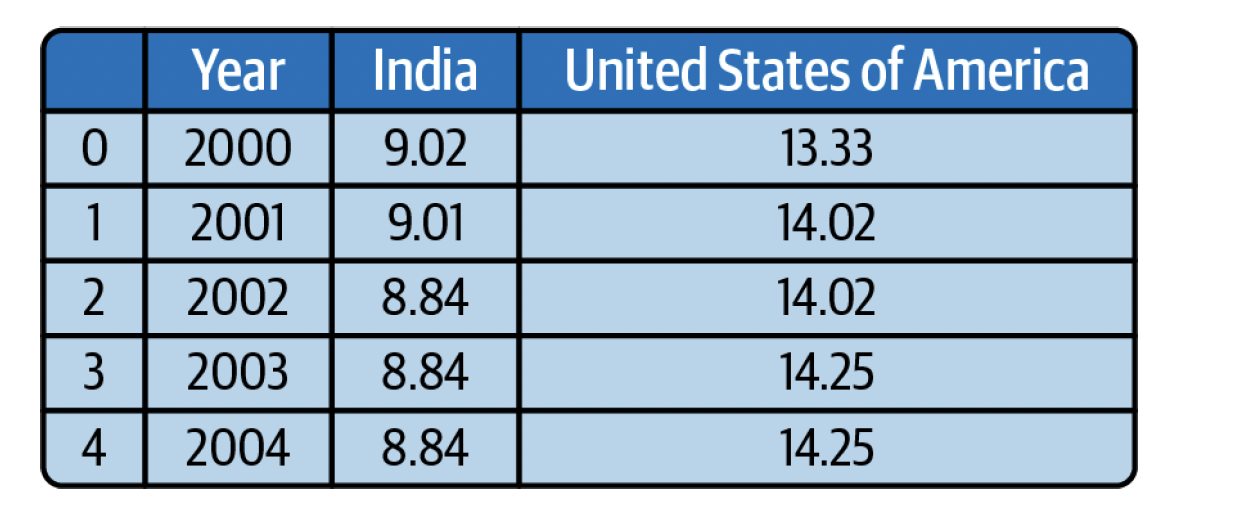

図7-1. 検証するデータフレーム

データを検証するために、データフレームに含めるべき列と各列のデータ型を示すスキーマを定義することができます。

In [6]:
!pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 5.0 MB/s eta 0:00:00


In [2]:
import pandera as pa

schema = pa.DataFrameSchema({
    "Year": pa.Column(int),                         # ❶
    "India": pa.Column(float),                      # ❷
    "United States of America": pa.Column(float)    # ❸
})

ModuleNotFoundError: No module named 'pandera'

1. 「Year」という名前の列があり、整数が含まれているはずです。

2. 「India」と名付けられた列があり、浮動小数点数を含む必要があります。

3. 「United States of America」という名前の列があり、そこに浮動小数点数が含まれているべきです。

次のコマンドを使用してデータを検証してください：

In [ ]:
schema(df)

これはスキーマに従ってデータを検証し、すべての列が揃っていることを確認し、各列のデータ型を検証します。スキーマで指定されたすべての列が存在しない場合、Panderaはエラーを投げますが、余分な列が存在しても文句を言いません。

また、列の値のプロパティを検証することもできます。期待される範囲内にすべての値が収まっているかどうかを確認できます。

checks 引数を使い、これにさまざまなPanderaオブジェクトを指定します。

In [ ]:
schema = pa.DataFrameSchema({
    "Year": pa.Column(int, checks=pa.Check.in_range(2000, 2023)),
    "India": pa.Column(float, checks=pa.Check.in_range(0, 100)),
    "United States of America": pa.Column(float, checks=pa.Check.in_range(0, 100))
})


データ検証が合格すると、必要なすべてのカラムが存在し、それぞれのカラムのデータが正しい型であり、データが期待する範囲内にあることを確認できます。これは単純な例に過ぎませんが、これを基にして独自のデータセットを検証することができます。

### Pydanticによるデータバリデーション

Pydanticを使用すると、実行時にデータのバリデーションを行うことができます。これは非常に便利なライブラリで、Pythonコミュニティで徐々に人気が高まっています。Pydanticは、「型チェック」で紹介した型アノテーションを使用してデータを検証しますが、mypyのような静的解析ツールではありません。

代わりに、バリデーションはコードを実行する際に行われ、別のツールを実行する必要はありません。これは、APIにコードをデプロイする場合に特に便利です。詳しくは第11章で説明します。

次のコマンドを使ってPydanticをインストールすることができます。

In [3]:
!pip install pydantic

Pydanticは、データの検証にデータスキーマという概念を使用します。まず、データのフォーマットを記述するスキーマを定義し、それを使って新しいデータが正しいフォーマットであることを確認できます。以下は、第1章の国連持続可能な開発目標データのためのスキーマを定義する例です。ここで、データの型を定義し、それが必須か（存在しない場合はエラーが発生します）またはオプションかを指定することができます。

In [ ]:
from pydantic import BaseModel
from typing import Optional
from datetime import datetime

class CountryData(BaseModel):
    country_name: str                   # ❶
    population: int                     # ❷
    literacy_rate_2020: Optional[float] # ❸
    timestamp: Optional[datetime] = None  # ❹


1. 国名は必須であり、文字列またはエラーを引き起こすことなく文字列に変換できるものでなければなりません。

1. 人口は必須であり、整数でなければなりません。

1. 識字率は任意であり、浮動小数点数または浮動小数点数に変換可能なものでなければなりません。

1. タイムスタンプはオプションであり、datetimeオブジェクトまたはdatetimeオブジェクトに変換可能なものでなければなりません。デフォルトはNoneです。


次に、正しいと検証されるデータの例を示します。

In [ ]:
sample_data_correct = {
    'country_name': 'India',
    'population': 1417242151,
    'literacy_rate_2020': 79.43,
    'timestamp': datetime.now()
}


次にこのデータを使用して、新しいデータが正しい形式で作成され、エラーが発生しないようにできます。

In [4]:
india=CountryData(**sample_data_correct)

NameError: name 'CountryData' is not defined

これらのデータを照会することができます。

In [ ]:
india.timestamp

ただし、このように要件に合わないデータを渡した場合は次のようになります：

In [5]:
sample_data_incorrect = {
    'country_name': 'United States',
    'population': None,
    'literacy_rate_2020': None,
    'timestamp': None
}

united_states = CountryData(**sample_data_incorrect)


NameError: name 'CountryData' is not defined

このデータはpopulationフィールドが欠落しています。
Pydanticが次のエラーを発生させます。

```
ValidationError: 1 validation error for CountryData
population
  Input should be a valid integer [type=int_type, input_value=None, input_type=NoneType]
```

入力は有効な整数である必要があります。

Pydanticは、大規模プロジェクトへの入力データが期待通りであることを確認するために非常に有用です。「APIに機能を追加する」で、APIでの使用例を示します。

### 機械学習のテスト（省略）

機械学習のコードは、他のほとんどのコードと少し異なる方法でテストする必要があります。これは、特定のデータセットからどのようなモデルが得られるかを正確に知ることができないためであり、ほとんどの機械学習アルゴリズムには何らかの形でランダム化が含まれているからです。しかし、これは機械学習コードをテストできないということではありません。このトピックは複雑ですが、このセクションでは概要を説明し、いくつかの有用な戦略について述べます。

図7-2は、一般的な機械学習プロジェクトの構造を示しています。これらの各ステップのテストの可能性を順番に説明し、特にいくつかに焦点を当てます。

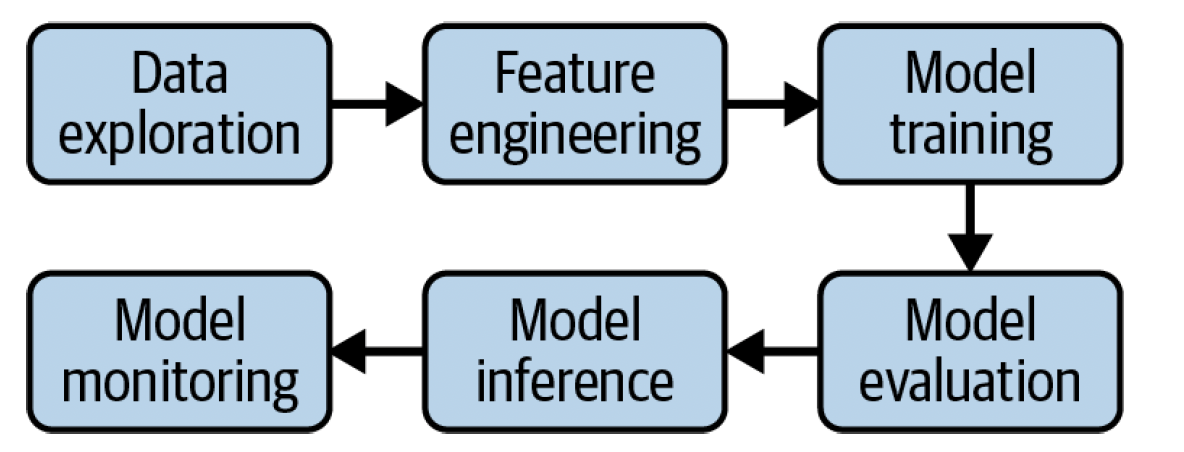

図7-2: 機械学習プロジェクトの手順

データ探索

プロジェクトの探索的フェーズでは、他の場所で再利用することを期待しているコードを書く場合を除き、テストを書く必要はありません。

特徴エンジニアリング

特徴量エンジニアリングのコードに対して単体テストを書くことができ、このステップにデータ検証を含めることができます。

モデルのトレーニング

次のセクションでこれを詳しく説明します。

モデル評価

モデル評価は、トレーニングされたモデルのデータセットに対する性能を評価するプロセスです。これ自体が一種のテストですが、モデルのトレーニングを実行するたびに結果はわずかに異なることがあります。たとえば、

この場合をテストに形式化するために、正確さが常にある一定のパーセンテージを上回ることを強制します。

モデル推論

これについては、次のセクションで詳しく説明します。

モデルモニタリング

本番環境でのモデルの監視は、多くの場合、外部のツールやライブラリによって処理されますが、自分でコードを書く場合はユニットテストを追加することができます。

モデルトレーニングのテスト

モデルのトレーニングをテストするのは難しいです。なぜなら、ある入力データに対して期待される出力がわからないからです。ニューラルネットワークの重みがどうあるべきか、保存されたモデルファイルに含まれるすべてのパラメータも把握できません。特定のデータセットが特定のモデル構造をもたらすかどうかをテストすることはできません。しかし、テストできることは確かにあり、その戦略は大きなモデルを使用しているのか、トレーニングに時間がかかるモデル（数分以上かかると仮定します）なのか、小さなモデルなのかによって異なります。

モデルのトレーニングに時間がかかる場合、モデルの出力が正しいかどうかや最終的なモデルの精度をテストするのは非現実的です。その代わりに、トレーニングが期待通りに進行していることと、モデルがクラッシュせずにトレーニングできることを確認する必要があります。そのためには、トレーニングステップの前後でモデルの重みを比較し、それらが変化していることを確認するテストを書くことができます。

ニューラルネットワークのもう一つの選択肢として、最初の数回のトレーニングステップで損失が減少するかどうかを確認することができます。また、モデルが正しい形状の入力テンソルを受け取り、正しい形状の出力を生成することをチェックするテストを書くこともできます。これは一般的なエラーの原因となるためです。

小さなモデルの場合、トレーニングプロセスの最後にモデルが存在することを確認する統合テストを書くこともできます。速度を重視するために、トレーニングデータの一部を使用するか、フェイクデータを使用することができます。

モデル推論のテスト

モデルをトレーニングした後は、予測を正確に返しているかどうかを確認する必要があります。プロダクションで推論を行うモデルをテストするための主な戦略は2つあります。まず、推論コードが正しく機能しているかどうかをチェックするために、ユニットテストと統合テストを書くべきです。例えば、予測を仮の入力データに対して返すかどうか、空の入力を正しく処理するかどうか、エラーを優雅に処理するかどうかを確認します。モデルが非常に大きい場合は、小さなサンプルモデルでいくつかのテストを実行し、モデルの完全版でいくつかのテストを実行することを検討してください。

第2に、特定のデータ例をモデルに送信し、そのモデルの予測が期待通りであることを確認できます。これはモデル評価とは異なり、全体の評価データセットの代わりに、ほんの少しのデータ例を使用する点が異なります。回帰モデルの場合、特定のデータ例に対するモデルの出力が正しい範囲内にあることを確認することができます。また、分類モデルの場合、常に特定のクラスとなるべき入力を与えることができます。これらの予測が正しく行われている場合にのみ、モデルを本番環境にデプロイしたいと考えます。

機械学習のテストについてもっと知りたい方は、Jeremy Jordanの記事をご覧ください。

## この章の重要なポイント

テストを書くことは良いコードを書くための重要な部分であり、特に堅牢なコードを書くのに役立ちます。コードを書き換えた場合でも正しい動作を保証するため、他の環境でもコードが機能することを確認するため、コードが期待通りに動作しているか確認するため、人々がコードを信頼するのを助けるため、そしてデバッグやリファクタリングを助けるために、テストを書くべきです。

最もシンプルなテストは、いくつかの単純な入力で関数が期待通りの結果を返すかどうかを確認するものです。テストは、準備、実行、検証、クリーンアップのステップで構成しましょう。次に、境界ケースを追加します。テストは手動で実行せずに、Pytestのようなテストフレームワークを使用してください。

データ全体の特性を使用してデータを検証することで、プロジェクト内のデータが期待どおりであることを確認できます。Panderaは、pandasのDataFrameを検証するための使いやすいオプションです。

機械学習（ML）は、特定のデータセットから生成されるモデルが正確にどのようなものになるか分からないため、異なるアプローチが必要です。しかし、それでも可能な限り単体テストを含むテストを書くべきです。